In [2]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math # donne acces aux fonctions et constantes mathematiques
%matplotlib inline 
# ouvre les fenetres graphiques dans le notebook

# 1. Le pendule simple

ÉNONCÉ.

L'équation du pendule simple est : (1)
\begin{align} \theta''(t)  &=  - \frac{g}{l}sin(\theta(t)) + \frac{B}{m} cos(\Omega t)\\
\theta(0) &= \theta_0, \\
\theta'(0) &=r_0
\end{align}

Quand on fait l'approximation des petites oscillations, on a : (2) 
\begin{align} \theta''(t)  &= - \frac{g}{l}\theta(t) + \frac{B}{m} cos(\Omega t)\\
\theta(0) &= \theta_0, \\
\theta'(0) &=r_0
\end{align}

pour $t\in[0, T]$, avec $T>0$, et où $m$ est la masse du pendule, $g$ est la constante de gravité ($g \approx 9.81m.s^-2$), $l$ est la longueur du fil du pendule, $B$ et $\Omega$ sont des pramètres positifs ou nuls, et $\theta$ représente l'angle de déviation entre la verticale et le fil.

### Question 1. 

Posons $f_1 : (t, \theta) \mapsto f_1(t, \theta) = - \frac{g}{l}sin(\theta) + \frac{B}{m} cos(\Omega t)$ 
et 
$f_2 : (t, \theta) \mapsto f_2(t, \theta) = - \frac{g}{l}\theta + \frac{B}{m} cos(\Omega t)$ 

On a : $f_1(t, \lambda\theta) = - \frac{g}{l}sin(\lambda\theta) + \frac{B}{m} cos(\Omega t) \neq -\lambda \frac{g}{l}sin(\theta) + \frac{B}{m} cos(\Omega t)$ donc (1) n'est pas linéaire. 


Pour (2), on a : $f_2(t, \lambda\theta) = - \frac{g}{l}\lambda\theta + \frac{B}{m} cos(\Omega t) = -\lambda \frac{g}{l}\theta + \frac{B}{m} cos(\Omega t)$, (2) est linéaire. 

### Question 2. 

Vitesse angulaire $v : t \mapsto \theta'(t)$. 

Ici, le but est de mettre sous la forme d'un système linéaire d'ordre 1 l'équation différentielle ordinaire de chacun des deux problèmes. 

On définit ainsi deux fonction vectorielles $F_NL$ et $F_L$ telles que : 
$$ F_{NL}(t, \Theta) = \begin{pmatrix}
 f_{NL}(t, \Theta) \\h_{NL}(t, \Theta)
\end{pmatrix} $$
et
$$ F_{L}(t, \Theta) = \begin{pmatrix}
 f_{L}(t, \Theta) \\h_{L}(t, \Theta)
\end{pmatrix} $$

où $\Theta : \mathbb{R}^2 \ni t \mapsto (\theta(t), v(t)) \in \mathbb{R}^2$

En posant pour (1) (non linéaire) :
$$f_{NL} : (t, \theta, v) \mapsto v$$
et
$$h_{NL} : (t, \theta, v) \mapsto - \frac{g}{l}sin(\theta) + \frac{B}{m} cos(\Omega t)$$ 
et pour (2) (linéaire) :
$$f_{L} : (t, \theta, v) \mapsto v$$
et
$$h_{L} : (t, \theta, v) \mapsto - \frac{g}{l}\theta + \frac{B}{m} cos(\Omega t)$$ 
on obtient le résultat. 

### Question 3. 

In [3]:
g, l, m, B = 9.81, 1, 1, 0
Omega = 0

# Pour le probleme non-lineaire (1) :
def f_NL(t, theta, v):
    return v 

def h_NL(t, theta, v):
    hNL = -(g/l)*np.sin(theta)+(B/m)*np.cos(Omega*t)
    return hNL

# Pour le probleme lineaire (2) :
def f_L(t, theta, v):
    return v

def h_L(t, theta, v):
    hL = -(g/l)*theta+(B/m)*np.cos(Omega*t)
    return hL 


### Question 4. 

In [4]:
# Methode d'Euler symplectique. 

def EulerSymplectique(t0, theta0, r0, T, dt, f, h):
    N = int(T/dt)
    TPS = np.zeros(N+1)
    TPS[0] = t0
    X = np.zeros((N+1,2))
    X[0] = [theta0, r0]
    for i in range (N):
        TPS[i+1] = TPS[i] + dt
        X[i+1][0] = X[i][0] + dt*f(TPS[i], X[i][0], X[i][1])
        X[i+1][1] = X[i][1] + dt*h(TPS[i], X[i][0], X[i][1])
    return N, TPS, X

t0, theta0, r0, T, M = 0, np.pi/6, 0, 10, 10000
dt = T/M

In [13]:
# Fonction qui prend en argument les conditions initiales et qui retourne les tableaux de temps, position et vitesse. 
def TabCondIniNL(theta0, r0):
    approxNL = EulerSymplectique(t0, theta0, r0, T, dt, f_NL, h_NL)
    NNL = approxNL[0]
    tempsNL = approxNL[1]
    thetaNL = [approxNL[2][i][0] for i in range (NNL+1)]
    vNL = [approxNL[2][i][1] for i in range (NNL+1)]
    return tempsNL, thetaNL, vNL

def TabCondIniL(theta0, r0):
    approxL = EulerSymplectique(t0, theta0, r0, T, dt, f_L, h_L)
    NL = approxL[0]
    tempsL = approxL[1]
    thetaL = [approxL[2][i][0] for i in range (NL+1)]
    vL = [approxL[2][i][1] for i in range (NL+1)]
    return tempsL, thetaL, vL

In [18]:
tempsNL_1, thetaNL_1, vNL_1 = TabCondIniNL(np.pi/6, 0)
tempsL_1, thetaL_1, vL_1 = TabCondIniL(np.pi/6, 0)

### Question 5. 

Occupons-nous d'abord du problème non-linéaire. 
On considère les tableaux de valeurs suivants :

In [41]:
def representationGraphique(temps, position, vitesse):   
    plt.figure()
    plt.subplot(1,3,1)  # le graphe de la position en fonction du temps
    plt.plot(temps,position, label='position')
    plt.xlabel('temps')
    plt.ylabel('position')
    plt.legend()
    
    plt.subplot(1,3,2) # le graphe de la vitesse en fonction du temps
    plt.plot(temps,vitesse, label='vitesse')
    plt.xlabel('temps')
    plt.ylabel('vitesse')
    plt.legend()

    plt.subplot(1,3,3) #le graphe dans l'espace des phases
    plt.plot(position, vitesse, label='espace des phases')
    plt.xlabel('position')
    plt.ylabel('vitesse')
    plt.legend()
    
    plt.subplots_adjust(top=1, bottom=0, left=0, right=2, hspace=0.7, wspace=0.25)
    
    return plt.show()

In [42]:
def superpositionGraph(X1, Y1, X2, Y2, abscisse, ordonnee, label1, label2, title):
    plt.figure()
    plt.title(title)
    plt.plot(X1, Y1, X2, Y2)
    plt.xlabel(abscisse)
    plt.ylabel(ordonnee)
    plt.legend([label1, label2], bbox_to_anchor=(1.5,1))
    return plt.show()

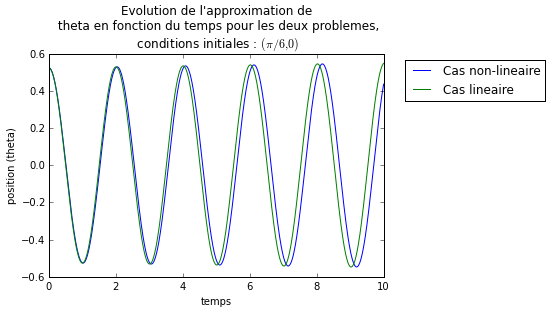

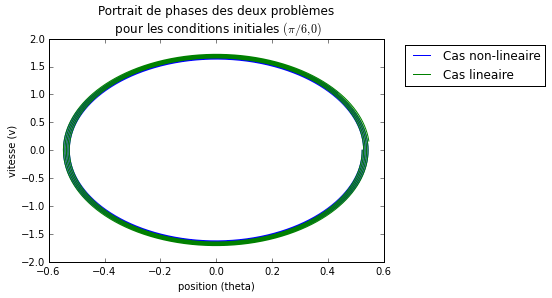

In [43]:
superpositionGraph(tempsNL_1,thetaNL_1,tempsL_1,thetaL_1,'temps', 
                   'position (theta)', 'Cas non-lineaire', 'Cas lineaire', 
                   "Evolution de l'approximation de \n theta en fonction du temps pour les deux problemes, \n conditions initiales : $(\pi/6, 0)$")
superpositionGraph(thetaNL_1,vNL_1,thetaL_1,vL_1,'position (theta)', 'vitesse (v)', 
                   'Cas non-lineaire', 'Cas lineaire', 
                   "Portrait de phases des deux problèmes\n pour les conditions initiales $(\pi/6, 0)$")

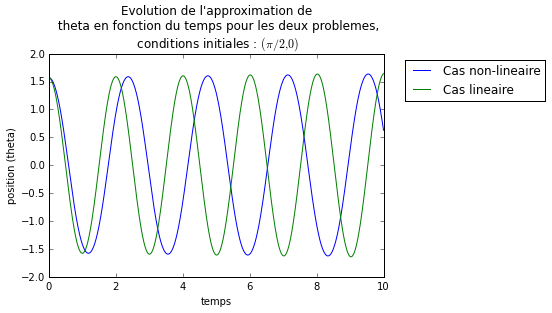

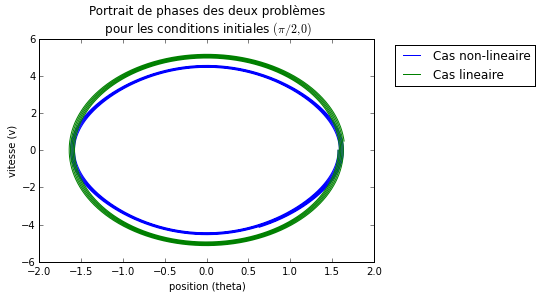

In [44]:
tempsNL_2, thetaNL_2, vNL_2 = TabCondIniNL(np.pi/2, 0)
tempsL_2, thetaL_2, vL_2 = TabCondIniL(np.pi/2, 0)

superpositionGraph(tempsNL_2,thetaNL_2,tempsL_2,thetaL_2,'temps', 'position (theta)', 
                   'Cas non-lineaire', 'Cas lineaire',
                   "Evolution de l'approximation de \n theta en fonction du temps pour les deux problemes, \n conditions initiales : $(\pi/2, 0)$")
superpositionGraph(thetaNL_2,vNL_2,thetaL_2,vL_2,'position (theta)', 'vitesse (v)', 
                   'Cas non-lineaire', 'Cas lineaire',
                   "Portrait de phases des deux problèmes\n pour les conditions initiales $(\pi/2, 0)$")

On parle d'approximation des petites oscillations car pour des conditions initales petites, le modèle linéaire approxime plutôt bien le modèle non linéaire, mais pour des conditions initiales plus grandes, un décalage important entre les deux modèles apparaît rapidement. 

### Question 6.

On a:
$$ F_{L}(t, \Theta) = \begin{pmatrix}
 f_{L}(t, \Theta) \\h_{L}(t, \Theta)
\end{pmatrix} = \begin{pmatrix}
 v \\-\frac{g}{l} \theta
\end{pmatrix}$$
i.e.
$$F_{L}(t, \Theta) = \begin{pmatrix}
-\frac{g}{l} && 0\\ 0 && 1 \end{pmatrix} \begin{pmatrix}
 \theta \\ v
\end{pmatrix}$$

Posons $$ A = \begin{pmatrix}
  -\frac{g}{l} && 0\\ 0 && 1
\end{pmatrix}$$. 

La solution au problème (2) est $$y : t \mapsto e^{At} \begin{pmatrix}
 \theta^0 \\ r^0 \end{pmatrix} $$

### Question 7.